Question 1: What is multiprocessing in python? Why is it useful?

Answer :

Multiprocessing in Python refers to the ability to execute multiple processes or tasks simultaneously on multiple processors or cores of a computer, as opposed to executing them in a sequential manner.

In simpler terms, multiprocessing allows you to take advantage of the multi-core processors in modern computers to perform CPU-intensive tasks more efficiently, by splitting them into smaller sub-tasks that can be executed simultaneously on different processors. This can significantly reduce the time taken to complete the tasks and improve the overall performance of the program.

In Python, the multiprocessing module provides a way to create and manage multiple processes. It offers several classes and functions to create and control processes, to communicate and share data between them, and to handle exceptions and errors that may occur during their execution.

Multiprocessing is useful in various scenarios, such as:

1. CPU-intensive tasks: Multiprocessing can speed up the execution of tasks that require a lot of CPU time, such as image processing, machine learning, and scientific computing.

2. Parallel programming: Multiprocessing can be used to implement parallel algorithms, where multiple processes work together to solve a problem.

3. Scalability: Multiprocessing can help to scale up the performance of a program as the size of the data or the complexity of the problem increases.

4. Fault-tolerance: Multiprocessing can improve the reliability of a program by isolating the processes from each other and preventing errors in one process from affecting the others.

Below is small example of multiprocessing

In [ ]:
import multiprocessing

def square(n):
    """
    This function returns square of a given number
    """
    return n**2

if __name__ == '__main__':
    pool = multiprocessing.Pool(processes=5)

    # Map the worker function to the numbers 0-3
    # The map function will divide the work and distribute it among the processes
    # Each process will execute the worker function with its assigned number
    results = pool.map(square, range(10))
    print(results)

    # Close the pool and wait for the worker processes to finish
    pool.close()
    pool.join()

    print('All squares calculated with multiprocessing')

Question 2: What are the differences between multiprocessing and multithreading?

Answer : Below Table describes differences between Multiprocessing and Multithreading

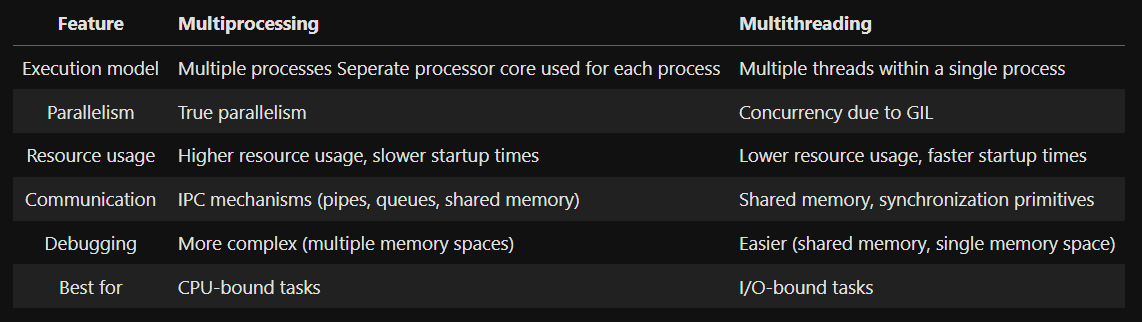

Question 3: Write a python code to create a process using the multiprocessing module.

Answer :

1. Let's say you have a Python program that performs some time-consuming task, such as downloading large files from the internet.

2. You want to be able to run this program in parallel, so that multiple downloads can happen at the same time, speeding up the overall process.
3. To achieve this, you can use the multiprocessing module to create a separate process for each download, allowing the downloads to happen in parallel.

In [1]:
# Example 1 
import multiprocessing
import requests

def download_file(url, filename):
    """Download a file from a given URL and save it to disk"""
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded {url} to {filename}")

if __name__ == '__main__':
    # URLs of files to download
    urls = [
        'https://raw.githubusercontent.com/utkarshg1/PWSkills-Assignments/main/Assignment%2013%20-%2014%20February%202023/data1.txt',
        'https://raw.githubusercontent.com/utkarshg1/PWSkills-Assignments/main/Assignment%2013%20-%2014%20February%202023/data2.txt',
        'https://raw.githubusercontent.com/utkarshg1/PWSkills-Assignments/main/Assignment%2013%20-%2014%20February%202023/data3.txt'
    ]

    # Create a new process for each download
    processes = []
    for i, url in enumerate(urls):
        filename = f"file{i+1}.txt"
        p = multiprocessing.Process(target=download_file, args=(url, filename))
        processes.append(p)
        p.start()

    # Wait for all processes to finish
    for p in processes:
        p.join()

    print("All downloads completed")

All downloads completed


In [2]:
#Example 2 Calculating cubes
import multiprocessing

def cube(index, value):
    """
    This function returns a cube of given index inside a list
    """
    value[index] = value[index]**3

if __name__ == '__main__':
    # Creating an example array list to get cubes
    arr = multiprocessing.Array('i',[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    # Creating processes list for appeding the processes
    process = []
    for i in range(15):
        m = multiprocessing.Process(target=cube,args=(i,arr))
        process.append(m)
        m.start()
        
    # Wait for processes to finish
    for j in process:
        j.join()
    print(list(arr))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


Question 4: What is a multiprocessing pool in python? Why is it used?

Answer :

In Python, a multiprocessing pool is a class in the multiprocessing module that provides a way to distribute tasks across multiple CPU cores. The idea is to create a pool of worker processes that can execute tasks in parallel, thereby reducing the time it takes to complete a large number of tasks.

Here's how it works:

1. You create a Pool object with a specified number of worker processes.
2. You submit tasks to the pool using the apply(), apply_async(), map(), or map_async() methods.
3. The pool distributes the tasks among the worker processes and runs them in parallel.
4. The results of each task are collected and returned to the main process.

The advantage of using a multiprocessing pool is that it allows you to take advantage of multiple CPU cores to perform computations in parallel. This can lead to significant speedups for CPU-bound tasks, such as numerical computations, image processing, or machine learning.

The Pool class in Python also provides various methods for controlling the number of worker processes, waiting for tasks to complete, and handling errors. Overall, it's a powerful tool for scaling up your Python programs to take advantage of modern hardware.

Question 5: How can we create a pool of worker processes in python using multiprocessing module?

Answer : We can create pool with help of multiprocessing.Pool Function

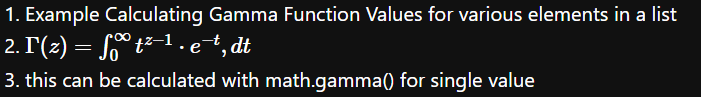



In [ ]:
import multiprocessing
import math

def calc_gamma(x):
    """Function to be executed by worker processes"""
    result = math.gamma(x)
    return result

if __name__ == '__main__':
    # Create a list of values for which to calculate the gamma function
    values = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Create a pool of worker processes
    pool = multiprocessing.Pool(processes=4)

    # Map the gamma function calculation function to the values
    results = pool.map(calc_gamma, values)

    # Close the pool and wait for the worker processes to finish
    pool.close()
    pool.join()

    # Print the results
    for i in range(len(values)):
        print(f"Gamma({values[i]}) = {results[i]}")

Question 6 : Write a python program to create 4 processes, each process should print a different number using the multiprocessing module in python.

Answer :

In [ ]:
import multiprocessing
import random

def generate_random_number(num):
    """
    This function generates random numbers between 1 to 100
    """
    random_number = random.randint(1, 100)
    print(f"Process number {num}, random number generated : {random_number}")

if __name__ == '__main__':
    # Creating a processess list
    processes = []
    for i in range(4):
        p = multiprocessing.Process(target=generate_random_number, args=(i,))
        processes.append(p)
        p.start()
    
    # Waiting for processess to complete
    for p in processes:
        p.join()